***
# Base Bi-LSTM Model running the kaggle squished emotions dataset<br>
***

***
## 1 Load the train/val/test/balanced test datasets
emotions_with_neutrals_220228.csv concatenated the neutrals from Kaggle dataset<br>
https://github.com/dair-ai/emotion_dataset<br>
https://huggingface.co/datasets/dair-ai/emotion<br>

In [1]:
import pandas as pd
import numpy as np

# mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# read from the google drive
project_folder = '/content/gdrive/MyDrive/266_Final_Project_Folder'

version = '_kaggle'

test_source = project_folder + '/datasets/kaggle_data_no_dupe_squished_emotions.csv'

# Load the dfs
test_df = pd.read_csv(test_source)

# drop the tweet_id column
test_df.drop(columns=test_df.columns[0], axis=1, inplace=True)

In [3]:
test_df

emotions                                               text
0      sadness  Layin n bed with a headache  ughhhh...waitin o...
1      sadness                Funeral ceremony...gloomy friday...
2      neutral  @dannycastillo We want to trade with someone w...
3         fear  Re-pinging @ghostridah14: why didn't you go to...
4      sadness  I should be sleep, but im not! thinking about ...
...        ...                                                ...
36460  neutral                                   @JohnLloydTaylor
36461     love                     Happy Mothers Day  All my love
36462     love  Happy Mother's Day to all the mommies out ther...
36463      joy  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
36464     love  @mopedronin bullet train from tokyo    the gf ...

[36465 rows x 2 columns]

***
## 2 Tokenizer

### Find the top word count (frequency > 10)
We'll use this number as our vocabulary size

In [4]:
# Split the text column into a list of words
words_df = test_df['text'].str.split().to_frame('words')

# Explode the list of words into separate rows
words_df = words_df.explode('words')

# Group by the words and count their occurrences
words_df = words_df.groupby('words').size().reset_index(name='count')
words_df

words  count
0             !    308
1            !!     91
2           !!!     71
3          !!!!     15
4         !!!!!      9
...         ...    ...
78125    ï¿½you      1
78126    ï¿½ï¿½      3
78127  ï¿½ï¿½We      1
78128  ï¿½ï¿½h.      1
78129   ï¿½ï¿½l      1

[78130 rows x 2 columns]

In [5]:
# find the words with 'count' > 10
condition = words_df['count'] > 10

# sort the words based on count
new_words_df = words_df[condition].sort_values('count', ascending=False)
new_words_df

words  count
72990      to  12787
27211       I  11673
72182     the  11015
37603       a   8501
61079      my   6574
...       ...    ...
75844    ways     11
47249  drinks     11
47402    dumb     11
47420     dun     11
35516   Tried     11

[3447 rows x 2 columns]

In [6]:
# how many words are > 10?
top_word_count = len(new_words_df)
print('Vocabulary size:', top_word_count)

Vocabulary size: 3447


### Let's tokenize the train tweets!

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = Tokenizer(num_words=top_word_count, oov_token='<UNK>')
tokenizer.fit_on_texts(test_df['text']) # pass in tweets from training set

In [9]:
# this is what the tweet looks like as words
test_df['text'][0]

'Layin n bed with a headache  ughhhh...waitin on your call...'

In [10]:
# this is what the tokenized version of the tweet looks like
tokenizer.texts_to_sequences([test_df['text'][0]])

[[1, 277, 154, 23, 5, 460, 3349, 2909, 15, 44, 293]]

(array([1.731e+03, 4.925e+03, 3.822e+03, 5.664e+03, 3.364e+03, 4.411e+03,
        2.487e+03, 3.582e+03, 3.146e+03, 1.720e+03, 1.312e+03, 2.390e+02,
        5.400e+01, 4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.        ,   3.56410256,   6.12820513,   8.69230769,
         11.25641026,  13.82051282,  16.38461538,  18.94871795,
         21.51282051,  24.07692308,  26.64102564,  29.20512821,
         31.76923077,  34.33333333,  36.8974359 ,  39.46153846,
         42.02564103,  44.58974359,  47.15384615,  49.71794872,
         52.28205128,  54.84615385,  57.41025641,  59.97435897,
         62.53846154,  65.1025641 ,  67.66666667,  70.23076923,
         72.79487179,  75.35897436,  77.92307692,  80.48717949,
 

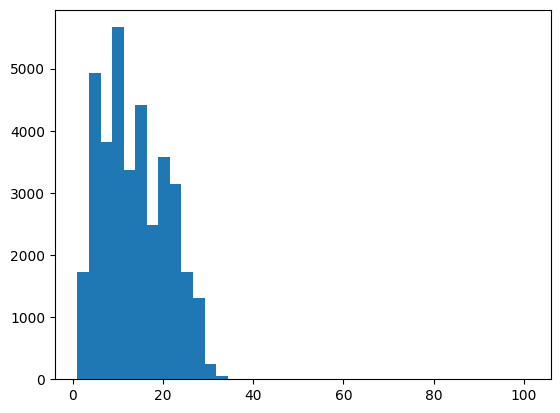

In [11]:
import matplotlib.pyplot as plt

# check to see what lenghts of the tweets in the dataset
lengths = [len(t.split(' ')) for t in test_df['text']]
plt.hist(lengths, bins=len(set(lengths)))

In [12]:
import statistics

# Apply the lambda function to the 'content' column and list called word_count_list'
word_count_list = list(test_df['text'].apply(lambda x: len(x.split(' '))))

# display the maximum and minimum lengths
print('Maximum word count:', max(word_count_list))
print('Minimum word count:', min(word_count_list))
print('Mean word count:', statistics.mean(word_count_list))
print('Median word count:', statistics.median(word_count_list))
print('75th percentile word count:', np.percentile(word_count_list, 75))
print('85th percentile word count:', np.percentile(word_count_list, 85))
print('95th percentile word count:', np.percentile(word_count_list, 95))

Maximum word count: 101
Minimum word count: 1
Mean word count: 13.700671877142465
Median word count: 13
75th percentile word count: 19.0
85th percentile word count: 22.0
95th percentile word count: 26.0


The max number of words is 101. We ultimately decided that we are going to keep all the words in the tweet. BERT can handle more than 200 so setting max_len = 200

***
## 3 Padding and truncating the training data sequences to make sure that the shape is the same for each string.

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
max_len = 200 # set the largest tweet size, >200 words -> truncate, <200 words -> pad

def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=max_len) # truncating happens at the end of the sequence (post)
  return padded # all examples will be the returned with same input size

In [15]:
# padded_train_seq = get_sequences(tokenizer, train_df['text'])
# padded_train_seq[0]

***
## 4 Convert labels to numeric

### Function to convert text labels to numeric (reuse for all datasets)

In [16]:
# keeping this consistent for all models
class_to_index_dict = {'sadness': 0, 'anger': 1, 'fear': 2, 'surprise': 3, 'joy': 4, 'love': 5, 'neutral': 6}
# ['sadness', 'anger', 'love', 'surprise', 'neutral']
# class_to_index_dict = {'sadness': 0, 'anger': 1, 'surprise': 3, 'love': 5, 'neutral': 6}
class_to_index_dict

{'sadness': 0,
 'anger': 1,
 'fear': 2,
 'surprise': 3,
 'joy': 4,
 'love': 5,
 'neutral': 6}

In [17]:
def names_to_ids(class_to_index, data):
  return np.array([class_to_index.get(x) for x in data])

In [18]:
# confirming if it worked (change index) and they should line up with above dict
index = 7
test_labels = names_to_ids(class_to_index_dict, test_df['emotions'])
print('train_df.iloc[7]:\n', test_df.iloc[index])
print('numeric label:', test_labels[index])

train_df.iloc[7]:
 emotions                                       sadness
text        @kelcouch I'm sorry  at least it's Friday?
Name: 7, dtype: object
numeric label: 0


***
## 5 Create the model

In [19]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import random

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


In [20]:
# ref: https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/
# ref: https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/
# ref: https://stackoverflow.com/questions/40331510/how-to-stack-multiple-lstm-in-keras

# keep the vocabulary size the same as the base model, 11039
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=11039, output_dim=8, input_length=max_len),
    
    # the RNN part of the model
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True)), # since using an LSTM layer inside a bidrectional layer, context can go in either direction; return_sequences=True means at every time step, there is an output
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, )),

    tf.keras.layers.Dense(7, activation='softmax') # 7 for the seven classes

])

model.compile(
    loss='sparse_categorical_crossentropy', # since this is a multiclass classification problem, use categorical crossentropy; since classes are integers (not one hot encoded/binary), use sparse (just like in A3)
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 8)            88312     
                                                                 
 bidirectional (Bidirectiona  (None, 20)               1520      
 l)                                                              
                                                                 
 dense (Dense)               (None, 7)                 147       
                                                                 
Total params: 89,979
Trainable params: 89,979
Non-trainable params: 0
_________________________________________________________________


### From Natalie's Notebook
https://github.com/datasci-w266/2023-spring-main/blob/master/materials/walkthrough_notebooks/keras_with_limited_ram/keras_training_with_limited_ram.ipynb<br><br>
https://edstem.org/us/courses/32607/discussion/2699088?comment=6229916

### Load the checkpoint from the base model!!!

In [22]:
# uncomment below when loading checkpoints
checkpoint_dir = project_folder + '/cm_working_dir/cm_checkpoints/base_model'
hdf5_checkpoint = 'weights.05-0.98' # change this to the right filename for the checkpoint
checkpoint_filepath = checkpoint_dir + '/' + hdf5_checkpoint + '.hdf5'
model.load_weights(checkpoint_filepath)

***
## 7 Evaluate the model using imbalanced test_df

In [23]:
# borrowing this from A3 assignment, but turned it into a function
# classification report (cr) and confusion matrix (cm) from A3
from sklearn.metrics import classification_report
import seaborn as sns

def make_cr_cm(preds, labels):

  predictions_model = tf.argmax(preds, axis=-1)
  predictions_model

  # convert labels to string because classification_report needs target_names as str
  # labels are currently ints, but will change to str of in (i.e. '0', '1', etc)
  # class_names = list(set([str(digit) for digit in labels]))

  class_names = ['0', '1', '2', '3', '4', '5', '6']

  # convert digits in target_names to the actual name of the emotion from the 
  # using class_to_index dictionary (i.e. '0' -> 'love', '5' -> 'neutral', etc.)
  class_names = [list(class_to_index_dict.keys())[list(class_to_index_dict.values()).index(int(name))] for name in class_names]

  print('Classification Report:\n\n', classification_report(labels, predictions_model.numpy(), target_names=class_names))

  print('Confusion Matrix:\n')
  
  # confusion matrix from A3
  cm = tf.math.confusion_matrix(labels, predictions_model)
  cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

  plt.figure(figsize=(20,7))
  sns.heatmap(
      cm, annot=True,
      xticklabels=class_names,
      yticklabels=class_names)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

### Padding the imbalanced test set for evaluation

In [24]:
padded_test_seq = get_sequences(tokenizer, test_df['text'])
padded_test_seq[0]

array([   1,  277,  154,   23,    5,  460, 3349, 2909,   15,   44,  293,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [25]:
# reminder of the class_to_index mapping
class_to_index_dict

{'sadness': 0,
 'anger': 1,
 'fear': 2,
 'surprise': 3,
 'joy': 4,
 'love': 5,
 'neutral': 6}

In [26]:
# confirming if it worked (change index) and they should line up with above dict
index = 7
test_labels = names_to_ids(class_to_index_dict, test_df['emotions'])
print('test_df.iloc[7]:\n', test_df.iloc[index])
print('numeric label:', test_labels[index])

test_df.iloc[7]:
 emotions                                       sadness
text        @kelcouch I'm sorry  at least it's Friday?
Name: 7, dtype: object
numeric label: 0


### Evaluating the model using test_df!!!

In [27]:
model.evaluate(padded_test_seq, test_labels)

1140/1140 [==============================] - 14s 8ms/step - loss: 4.5033 - accuracy: 0.2206


[4.503335952758789, 0.2205950915813446]

In [28]:
# printing out a random tweet and its label, then calling
# model.predict to see what the model predicts
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_df.iloc[i])
print('Emotion:', test_labels[i])

p = model.predict(np.expand_dims(padded_test_seq[i], axis=0))[0]
pred_class = np.argmax(p).astype('uint8')

print('Predicted Emotion:', pred_class)

Sentence: emotions                                             surprise
text        @CraigN No surprise there. They probably don't...
Name: 8424, dtype: object
Emotion: 3
1/1 [==============================] - 1s 664ms/step
Predicted Emotion: 6


In [29]:
preds_imbalanced_test_set = model.predict(padded_test_seq)

1140/1140 [==============================] - 8s 7ms/step


Classification Report:

               precision    recall  f1-score   support

     sadness       0.17      0.16      0.17      5142
       anger       0.04      0.08      0.06      1432
        fear       0.26      0.08      0.12      8421
    surprise       0.06      0.00      0.01      2177
         joy       0.18      0.17      0.18      6943
        love       0.14      0.01      0.02      3770
     neutral       0.27      0.61      0.37      8580

    accuracy                           0.22     36465
   macro avg       0.16      0.16      0.13     36465
weighted avg       0.20      0.22      0.18     36465

Confusion Matrix:



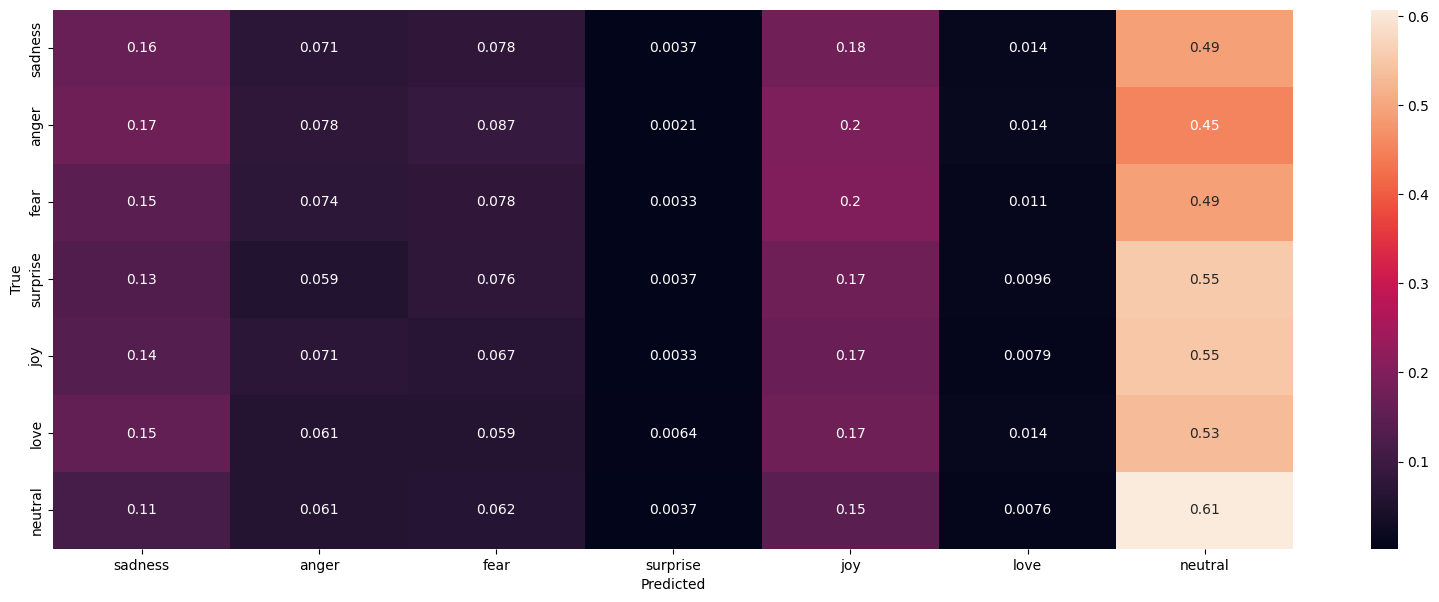

In [30]:
make_cr_cm(preds_imbalanced_test_set, test_labels)